In [497]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy2
import re
from sklearn.preprocessing import MultiLabelBinarizer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import ToktokTokenizer

%matplotlib inline

In [498]:
df = pd.read_csv('dataset.csv')
np.random.seed(500)

In [499]:
df.count()

id         216
text       216
classes    137
dtype: int64

In [500]:
df.head()

,id,text,classes
0,6nSIEp3ZfO4okkUaGmUksW,Строительная отрасль начала падение задолго до...,NaN
1,3VGhiB5MEwGqG4MQiKMw6U,Бизнес часто использует номинальных руководите...,NaN
2,28C2BJvmEsQKiS4AEO2eIE,За период с сентября 2017 года по октябрь 2018...,FMCG
3,65s7gPkLFmgkeIQQWCCcWW,"Также аналитики Knight Frank прогнозируют, что...",Недвижимость/Хранение
4,2ldCvrzcf6wcwOMwiI2A4U,Несмотря на то что основные экономические пока...,FMCG


### Предварительная обработка данных

Приведение всего текста к нижнему регистру

In [501]:
df['text'] = [entry.lower() for entry in df['text']]
df.head()

,id,text,classes
0,6nSIEp3ZfO4okkUaGmUksW,строительная отрасль начала падение задолго до...,NaN
1,3VGhiB5MEwGqG4MQiKMw6U,бизнес часто использует номинальных руководите...,NaN
2,28C2BJvmEsQKiS4AEO2eIE,за период с сентября 2017 года по октябрь 2018...,FMCG
3,65s7gPkLFmgkeIQQWCCcWW,"также аналитики knight frank прогнозируют, что...",Недвижимость/Хранение
4,2ldCvrzcf6wcwOMwiI2A4U,несмотря на то что основные экономические пока...,FMCG


Удаление знаков припенания

In [502]:
def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', str(sentence))
    cleaned = re.sub(r'[.|,|)|(|\|/|«|»|%|\||:]', r' ', str(cleaned))
    cleaned = cleaned.strip()
    cleaned = cleaned.replace(r'\n', ' ')
    return cleaned

In [503]:
df['text'] = df['text'].apply(cleanPunc)

Токенизация текстов статей

In [504]:
df['text'] = [word_tokenize(entry) for entry in df['text']]
df.head()

,id,text,classes
0,6nSIEp3ZfO4okkUaGmUksW,"[строительная, отрасль, начала, падение, задол...",NaN
1,3VGhiB5MEwGqG4MQiKMw6U,"[бизнес, часто, использует, номинальных, руков...",NaN
2,28C2BJvmEsQKiS4AEO2eIE,"[за, период, с, сентября, 2017, года, по, октя...",FMCG
3,65s7gPkLFmgkeIQQWCCcWW,"[также, аналитики, knight, frank, прогнозируют...",Недвижимость/Хранение
4,2ldCvrzcf6wcwOMwiI2A4U,"[несмотря, на, то, что, основные, экономически...",FMCG


Удаление не классифицированных статей

In [505]:
df.dropna(inplace=True)
df.count()

id         137
text       137
classes    137
dtype: int64

Лемматизация и удаление стоп-слов

In [506]:
morph = pymorphy2.MorphAnalyzer()

for index, row in df.iterrows():   
    final_words = []
    for word in row['text']:
        word = morph.parse(word)[0].normal_form
        if word not in stopwords.words('russian'):
            final_words.append(word)
    df.loc[index,'text_final'] = ' '.join(final_words)
    
df.head()

,id,text,classes,text_final
2,28C2BJvmEsQKiS4AEO2eIE,"[за, период, с, сентября, 2017, года, по, октя...",FMCG,период сентябрь 2017 год октябрь 2018 год росс...
3,65s7gPkLFmgkeIQQWCCcWW,"[также, аналитики, knight, frank, прогнозируют...",Недвижимость/Хранение,также аналитика knight frank прогнозировать ко...
4,2ldCvrzcf6wcwOMwiI2A4U,"[несмотря, на, то, что, основные, экономически...",FMCG,несмотря основной экономический показатель нах...
6,SlQ8gdBQCiQwgUuQMaY0g,"[россия, обладает, мощным, сегментом, хлебопек...",FMCG/Пищевая промышленность,россия обладать мощный сегмент хлебопекарный п...
7,5KWOefdhVC8ai4qQOmCoco,"[доля, свободных, офисных, площадей, уменьшила...",Недвижимость,доля свободный офисный площадь уменьшиться ква...


Кодирование меток

In [507]:
mlb = MultiLabelBinarizer()
df['classes'] = [item.split('/') for item in df['classes']]
mlb.fit_transform(df['classes'])

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [508]:
mlb.classes_

array(['FMCG', 'HoReCa', 'Автомобили, мотоциклы', 'Аптеки',
       'Банковские, финансовые услуги', 'Бытовая и цифровая техника',
       'Деревообработка', 'Инвестиции', 'Интернет-торговля', 'Кадры',
       'Лесное хозяйство', 'Мебель, товары для дома и ремонта', 'Напитки',
       'Недвижимость', 'Одежда, обувь, аксессуары',
       'Пищевая промышленность', 'Программное обеспечение',
       'Производство транспортных средств', 'Промышленное оборудование',
       'Растениеводство', 'Реклама', 'Рестораны', 'Салоны красоты и SPA',
       'Сенсорные технологии', 'Строительство', 'Телефония',
       'Товары для животных', 'Услуги по доставке, курьерские услуги',
       'Фармацевтика', 'Финансовые, банковские услуги',
       'Химическая промышленность', 'Хранение', 'Частная медицина'],
      dtype=object)

In [509]:
classes = pd.DataFrame(data=mlb.fit_transform(df['classes']), columns=mlb.classes_, index=df.index)
processed_df = pd.concat([df, classes], axis=1, sort=False)
processed_df

,id,text,classes,text_final,FMCG,HoReCa,"Автомобили, мотоциклы",Аптеки,"Банковские, финансовые услуги",Бытовая и цифровая техника,...,Сенсорные технологии,Строительство,Телефония,Товары для животных,"Услуги по доставке, курьерские услуги",Фармацевтика,"Финансовые, банковские услуги",Химическая промышленность,Хранение,Частная медицина
2,28C2BJvmEsQKiS4AEO2eIE,"[за, период, с, сентября, 2017, года, по, октя...",[FMCG],период сентябрь 2017 год октябрь 2018 год росс...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,65s7gPkLFmgkeIQQWCCcWW,"[также, аналитики, knight, frank, прогнозируют...","[Недвижимость, Хранение]",также аналитика knight frank прогнозировать ко...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2ldCvrzcf6wcwOMwiI2A4U,"[несмотря, на, то, что, основные, экономически...",[FMCG],несмотря основной экономический показатель нах...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SlQ8gdBQCiQwgUuQMaY0g,"[россия, обладает, мощным, сегментом, хлебопек...","[FMCG, Пищевая промышленность]",россия обладать мощный сегмент хлебопекарный п...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5KWOefdhVC8ai4qQOmCoco,"[доля, свободных, офисных, площадей, уменьшила...",[Недвижимость],доля свободный офисный площадь уменьшиться ква...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3dK0T8vaec4sA8oQqQc6ag,"[представители, саморегулируемых, организации,...",[Строительство],представитель саморегулируемый организация сро...,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,3fbGK1oSg8Ac0KSQsyO2oc,"[более, 40, глобальных, затрат, на, цифровую, ...","[Программное обеспечение, Интернет-торговля]",40 глобальный затрата цифровой трансформация с...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3tnEPGD9Mk6SY8Ym8iaqGK,"[основной, акционер, девелоперской, группы, пи...",[HoReCa],основной акционер девелоперский группа пик сер...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2wAoMSDy40ikiGYCM8sKM2,"[самые, высокие, зарплаты, получают, сотрудник...",[Кадры],самый высокий зарплата получать сотрудник заня...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,5tcdPrzB8AMemGIKko0gaW,"[в, октябре, этого, года, средний, чек, россия...",[FMCG],октябрь это год средний чек россиянин поход ма...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Исследовательский анализ данных

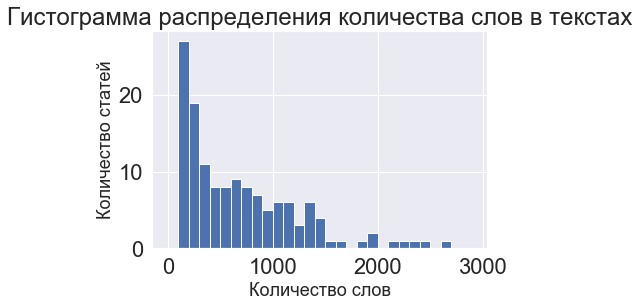

In [510]:
lens = df.text.str.len()
lens.hist(bins = np.arange(0,3000,100))

plt.title('Гистограмма распределения количества слов в текстах', fontsize=24)
plt.ylabel('Количество статей', fontsize=18)
plt.xlabel('Количество слов', fontsize=18)

plt.show()

Определение популярных слов в корпусе на облаке слов

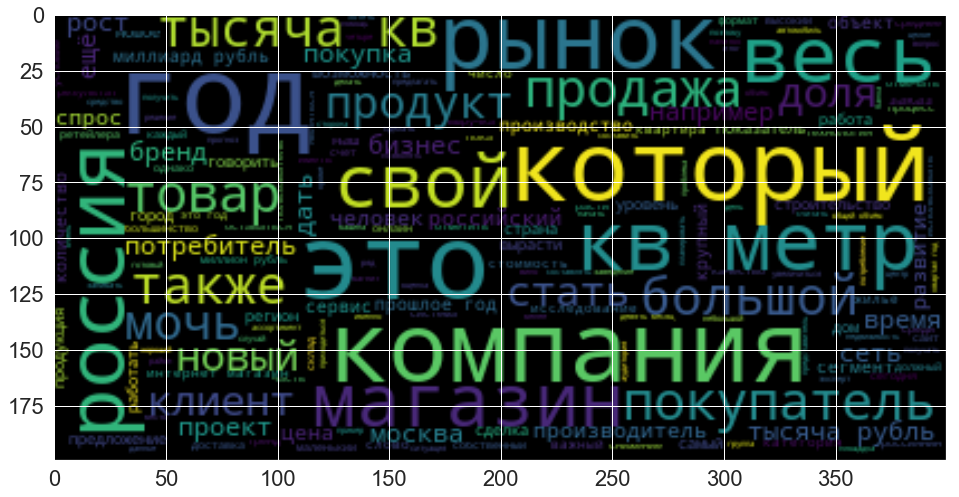

In [511]:
totalText = ''
for x in processed_df['text_final']:
    totalText = totalText + ' ' + x

wc = WordCloud(background_color='black',max_font_size=50).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')

In [512]:
processed_df.describe()

,FMCG,HoReCa,"Автомобили, мотоциклы",Аптеки,"Банковские, финансовые услуги",Бытовая и цифровая техника,Деревообработка,Инвестиции,Интернет-торговля,Кадры,...,Сенсорные технологии,Строительство,Телефония,Товары для животных,"Услуги по доставке, курьерские услуги",Фармацевтика,"Финансовые, банковские услуги",Химическая промышленность,Хранение,Частная медицина
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,0.248175,0.065693,0.029197,0.007299,0.072993,0.029197,0.014599,0.021898,0.160584,0.014599,...,0.007299,0.029197,0.007299,0.014599,0.007299,0.007299,0.014599,0.007299,0.007299,0.014599
std,0.433539,0.248655,0.168976,0.085436,0.261079,0.168976,0.120379,0.146887,0.368494,0.120379,...,0.085436,0.168976,0.085436,0.120379,0.085436,0.085436,0.120379,0.085436,0.085436,0.120379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Определение популярных слов в корпусе на графике

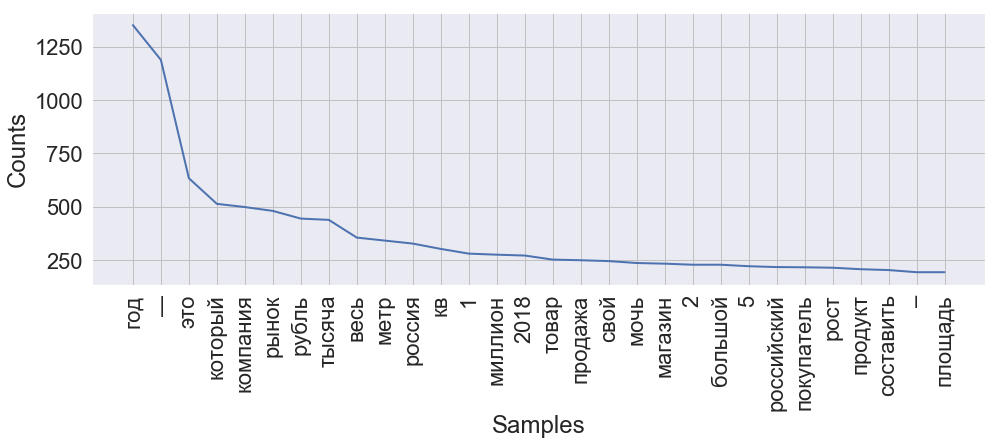

In [513]:
x = nltk.FreqDist(ToktokTokenizer().tokenize(totalText))

plt.figure(figsize=(16,5))
x.plot(30)

Подсчет того, сколько статей приходится на каждую категорию.
Определение самых популярных тегов

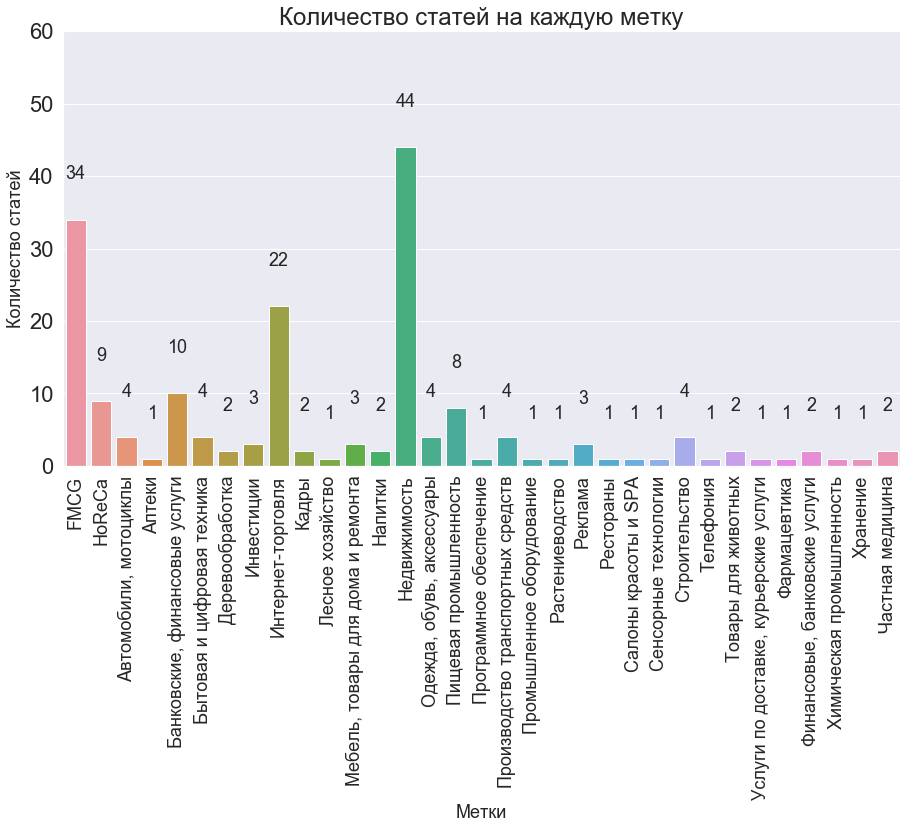

In [514]:
categories = list(processed_df.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(categories[4:], processed_df.iloc[:,4:].sum().values)

plt.title('Количество статей на каждую метку', fontsize=24)
plt.ylabel('Количество статей', fontsize=18)
plt.xlabel('Метки', fontsize=18)

rects = ax.patches
labels = processed_df.iloc[:,4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.xticks(fontsize=18, rotation=90)
plt.ylim(top=60)
plt.show()

Подсчет того, по сколько категорий приходится на статью

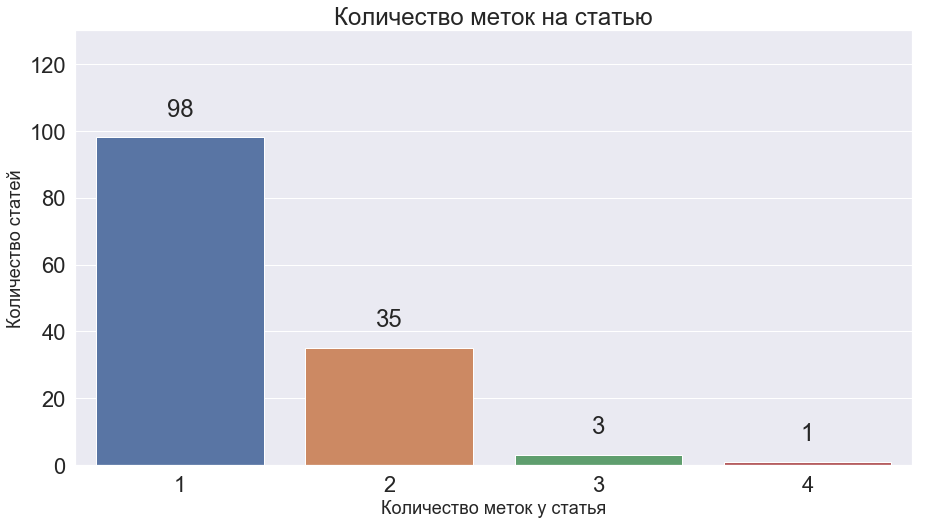

In [515]:
rowSums = processed_df.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title('Количество меток на статью')
plt.ylabel('Количество статей', fontsize=18)
plt.xlabel('Количество меток у статья', fontsize=18)

rects = ax.patches
labels = multiLabel_counts.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.ylim(top=130)
plt.show()

Сохранение обработанных данных

In [516]:
processed_df.to_csv('preprocessed_dataset.csv', index=False)

In [517]:
df_new = pd.read_csv('preprocessed_dataset.csv')
df_new.head()

,id,text,classes,text_final,FMCG,HoReCa,"Автомобили, мотоциклы",Аптеки,"Банковские, финансовые услуги",Бытовая и цифровая техника,...,Сенсорные технологии,Строительство,Телефония,Товары для животных,"Услуги по доставке, курьерские услуги",Фармацевтика,"Финансовые, банковские услуги",Химическая промышленность,Хранение,Частная медицина
0,28C2BJvmEsQKiS4AEO2eIE,"['за', 'период', 'с', 'сентября', '2017', 'год...",['FMCG'],период сентябрь 2017 год октябрь 2018 год росс...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65s7gPkLFmgkeIQQWCCcWW,"['также', 'аналитики', 'knight', 'frank', 'про...","['Недвижимость', 'Хранение']",также аналитика knight frank прогнозировать ко...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2ldCvrzcf6wcwOMwiI2A4U,"['несмотря', 'на', 'то', 'что', 'основные', 'э...",['FMCG'],несмотря основной экономический показатель нах...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SlQ8gdBQCiQwgUuQMaY0g,"['россия', 'обладает', 'мощным', 'сегментом', ...","['FMCG', 'Пищевая промышленность']",россия обладать мощный сегмент хлебопекарный п...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5KWOefdhVC8ai4qQOmCoco,"['доля', 'свободных', 'офисных', 'площадей', '...",['Недвижимость'],доля свободный офисный площадь уменьшиться ква...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
